### Exploring the output from CoverM

We've used all SAGs on AG-910 as the input genomes, and the metagenomes from BATs surface samples as inputs for coverM.  Let's see what the results look like.

First we'll import a couple of libraries:

In [1]:
import pandas as pd    # for reading and munging data frames
import matplotlib.pyplot as plt # a python plotting library
import seaborn as sns    # a python library for creating simple, nice looking plots with matplotlib

from matplotlib.dates import DateFormatter


from collections import Counter # an easy way to count elements in a list

Now we will load a couple different data tables, and will need to clean them up a bit so that they are ready to play with.

In [2]:
metagenome_metadata = "./data/bats_metagenomes_of_interest.csv"

sag_metadata = "/mnt/storage/data/sag_deliverables/AG-910_assembly_stats_updated.csv"

recruitment_table = "/mnt/storage/lesson_analyses/coverm/AG_910_minimap2-sr" 

In [3]:
# load the recruitment table and call it 'rdf' for 'recruitment dataframe'
rdf = pd.read_csv(recruitment_table, sep = "\t")
rdf.head()

,Genome,SRR5720233_1.fastq.gz Relative Abundance (%),SRR5720235_1.fastq.gz Relative Abundance (%),SRR5720238_1.fastq.gz Relative Abundance (%),SRR5720251_1.fastq.gz Relative Abundance (%),SRR5720256_1.fastq.gz Relative Abundance (%),SRR5720260_1.fastq.gz Relative Abundance (%),SRR5720262_1.fastq.gz Relative Abundance (%),SRR5720278_1.fastq.gz Relative Abundance (%),SRR5720283_1.fastq.gz Relative Abundance (%),SRR5720286_1.fastq.gz Relative Abundance (%),SRR5720307_1.fastq.gz Relative Abundance (%),SRR5720321_1.fastq.gz Relative Abundance (%),SRR5720322_1.fastq.gz Relative Abundance (%),SRR5720327_1.fastq.gz Relative Abundance (%),SRR5720332_1.fastq.gz Relative Abundance (%),SRR5720337_1.fastq.gz Relative Abundance (%),SRR5720338_1.fastq.gz Relative Abundance (%),SRR5720342_1.fastq.gz Relative Abundance (%),SRR6507279_1.fastq.gz Relative Abundance (%)
0,unmapped,95.915300,74.883250,97.379456,86.402800,96.196500,75.034950,89.644950,89.561650,84.792946,67.258750,85.007200,79.603950,93.225800,82.492400,87.859900,97.318350,97.791,89.058000,71.355850
1,AG-910-I04_contigs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
2,AG-910-N18_contigs,0.000000,0.051973,0.000000,0.039565,0.000000,0.000000,0.044398,0.039227,0.000000,0.034618,0.050800,0.000000,0.000000,0.043655,0.038832,0.000000,0.000,0.000000,0.070772
3,AG-910-L04_contigs,0.036017,0.141393,0.032294,0.076190,0.040551,0.139617,0.056892,0.055073,0.059614,0.130149,0.083268,0.087849,0.052642,0.091994,0.075117,0.029423,0.000,0.056989,0.197780
4,AG-910-N05_contigs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


This is a data matrix with relative metagenomic abundance for columns, and SAGs for rows.  You'll notice there's also a row for unmapped reads.  

The first thing I'm going to do with this table is clean up the column and row names so that they're easier to work with and match to the metadata tables.  

For the metagenome columns, I want to only keep the SRA id (everything before the underscore).  

In [4]:
# checking column names

rdf.columns

Index(['Genome', 'SRR5720233_1.fastq.gz Relative Abundance (%)',
       'SRR5720235_1.fastq.gz Relative Abundance (%)',
       'SRR5720238_1.fastq.gz Relative Abundance (%)',
       'SRR5720251_1.fastq.gz Relative Abundance (%)',
       'SRR5720256_1.fastq.gz Relative Abundance (%)',
       'SRR5720260_1.fastq.gz Relative Abundance (%)',
       'SRR5720262_1.fastq.gz Relative Abundance (%)',
       'SRR5720278_1.fastq.gz Relative Abundance (%)',
       'SRR5720283_1.fastq.gz Relative Abundance (%)',
       'SRR5720286_1.fastq.gz Relative Abundance (%)',
       'SRR5720307_1.fastq.gz Relative Abundance (%)',
       'SRR5720321_1.fastq.gz Relative Abundance (%)',
       'SRR5720322_1.fastq.gz Relative Abundance (%)',
       'SRR5720327_1.fastq.gz Relative Abundance (%)',
       'SRR5720332_1.fastq.gz Relative Abundance (%)',
       'SRR5720337_1.fastq.gz Relative Abundance (%)',
       'SRR5720338_1.fastq.gz Relative Abundance (%)',
       'SRR5720342_1.fastq.gz Relative Abundance (%)',


In [5]:
# clean up column names

new_colnames = [i if '_' not in i else i.split("_")[0] for i in rdf.columns]
new_colnames

['Genome',
 'SRR5720233',
 'SRR5720235',
 'SRR5720238',
 'SRR5720251',
 'SRR5720256',
 'SRR5720260',
 'SRR5720262',
 'SRR5720278',
 'SRR5720283',
 'SRR5720286',
 'SRR5720307',
 'SRR5720321',
 'SRR5720322',
 'SRR5720327',
 'SRR5720332',
 'SRR5720337',
 'SRR5720338',
 'SRR5720342',
 'SRR6507279']

In [6]:
rdf.columns = new_colnames
rdf.head()

,Genome,SRR5720233,SRR5720235,SRR5720238,SRR5720251,SRR5720256,SRR5720260,SRR5720262,SRR5720278,SRR5720283,SRR5720286,SRR5720307,SRR5720321,SRR5720322,SRR5720327,SRR5720332,SRR5720337,SRR5720338,SRR5720342,SRR6507279
0,unmapped,95.915300,74.883250,97.379456,86.402800,96.196500,75.034950,89.644950,89.561650,84.792946,67.258750,85.007200,79.603950,93.225800,82.492400,87.859900,97.318350,97.791,89.058000,71.355850
1,AG-910-I04_contigs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
2,AG-910-N18_contigs,0.000000,0.051973,0.000000,0.039565,0.000000,0.000000,0.044398,0.039227,0.000000,0.034618,0.050800,0.000000,0.000000,0.043655,0.038832,0.000000,0.000,0.000000,0.070772
3,AG-910-L04_contigs,0.036017,0.141393,0.032294,0.076190,0.040551,0.139617,0.056892,0.055073,0.059614,0.130149,0.083268,0.087849,0.052642,0.091994,0.075117,0.029423,0.000,0.056989,0.197780
4,AG-910-N05_contigs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


I next want to do the same thing for the 'genomes column'.  I will remove the '_contigs' suffix.

In [7]:
rdf['Genome'] = [i.replace('_contigs','') for i in rdf['Genome']]
rdf.head()

,Genome,SRR5720233,SRR5720235,SRR5720238,SRR5720251,SRR5720256,SRR5720260,SRR5720262,SRR5720278,SRR5720283,SRR5720286,SRR5720307,SRR5720321,SRR5720322,SRR5720327,SRR5720332,SRR5720337,SRR5720338,SRR5720342,SRR6507279
0,unmapped,95.915300,74.883250,97.379456,86.402800,96.196500,75.034950,89.644950,89.561650,84.792946,67.258750,85.007200,79.603950,93.225800,82.492400,87.859900,97.318350,97.791,89.058000,71.355850
1,AG-910-I04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
2,AG-910-N18,0.000000,0.051973,0.000000,0.039565,0.000000,0.000000,0.044398,0.039227,0.000000,0.034618,0.050800,0.000000,0.000000,0.043655,0.038832,0.000000,0.000,0.000000,0.070772
3,AG-910-L04,0.036017,0.141393,0.032294,0.076190,0.040551,0.139617,0.056892,0.055073,0.059614,0.130149,0.083268,0.087849,0.052642,0.091994,0.075117,0.029423,0.000,0.056989,0.197780
4,AG-910-N05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


Finally, I want to melt the table so that each row is a single observation.  This will be help for data matching and merging.

In [8]:
rdf_melt = rdf.melt(id_vars = 'Genome', var_name = 'metagenome',value_name = 'perc_rel_abund')
rdf_melt.head()

,Genome,metagenome,perc_rel_abund
0,unmapped,SRR5720233,95.915300
1,AG-910-I04,SRR5720233,0.000000
2,AG-910-N18,SRR5720233,0.000000
3,AG-910-L04,SRR5720233,0.036017
4,AG-910-N05,SRR5720233,0.000000


Now let's load the metagenome metadata:

In [12]:
mg_metadata = pd.read_csv(metagenome_metadata)
mg_metadata = mg_metadata[mg_metadata['downloaded'] == 'yes'].copy()

#append 'mg' to column names for table merging:

mg_metadata.columns = ['mg_' + i for i in mg_metadata.columns]

In [13]:
print("metadata columns:\n", mg_metadata.columns)

metadata columns:
 Index(['mg_Run', 'mg_Collection_date', 'mg_cruise_id', 'mg_BioSample',
       'mg_Depth', 'mg_downloaded'],
      dtype='object')


In [14]:
bdf = rdf_melt.merge(mg_metadata, left_on = 'metagenome', right_on = 'mg_Run', how = 'left')

# check to see that there are the same number of rows in the old and new dataframe
print(len(rdf_melt), len(bdf))

4313 4313


OK, let's plot!  First, let's look at how well these SAGs represented these metagenomes by looking at the distribution of unmapped reads:

In [15]:
bdf.columns

Index(['Genome', 'metagenome', 'perc_rel_abund', 'mg_Run',
       'mg_Collection_date', 'mg_cruise_id', 'mg_BioSample', 'mg_Depth',
       'mg_downloaded'],
      dtype='object')

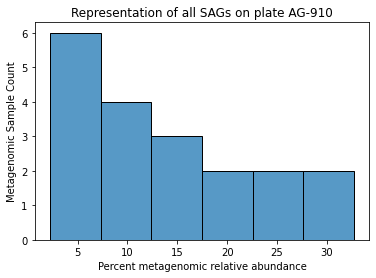

In [16]:
plot_df = bdf[bdf['Genome'] == 'unmapped']

sns.histplot(100 - plot_df['perc_rel_abund'])

plt.xlabel('Percent metagenomic relative abundance')
plt.ylabel('Metagenomic Sample Count')
plt.title('Representation of all SAGs on plate AG-910')
plt.show()

Looks like variable success recuiting metagenomic reads to SAGs on this plate. 

In [17]:
# Check how many samples we have at each depth:
Counter(mg_metadata['mg_Depth'])

Counter({'1m': 14, '10m': 5})

How does relative representation vary by collection date?

First we need to format collection date in our dataframe so that we can plot it.  It is currently in this format:

In [18]:
bdf['mg_Collection_date']

0       2003-02-21
1       2003-02-21
2       2003-02-21
3       2003-02-21
4       2003-02-21
           ...    
4308    2009-07-14
4309    2009-07-14
4310    2009-07-14
4311    2009-07-14
4312    2009-07-14
Name: mg_Collection_date, Length: 4313, dtype: object

In [19]:
# split date by year, month, day
bdf[['mg_year','mg_month','mg_day']] = bdf['mg_Collection_date'].str.split("-", expand = True)

# making month and day columns numeric (I want to keep year categorical, as there are only 3 different years examined)
bdf[['mg_month','mg_day']] = bdf[['mg_month','mg_day']].apply(pd.to_numeric)

# finally, converting the original date column to date format (not actually necessary, just showing how to do it)
bdf['mg_Collection_date'] = pd.to_datetime(bdf['mg_Collection_date'])

bdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313 entries, 0 to 4312
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Genome              4313 non-null   object        
 1   metagenome          4313 non-null   object        
 2   perc_rel_abund      4313 non-null   float64       
 3   mg_Run              4313 non-null   object        
 4   mg_Collection_date  4313 non-null   datetime64[ns]
 5   mg_cruise_id        4313 non-null   object        
 6   mg_BioSample        4313 non-null   object        
 7   mg_Depth            4313 non-null   object        
 8   mg_downloaded       4313 non-null   object        
 9   mg_year             4313 non-null   object        
 10  mg_month            4313 non-null   int64         
 11  mg_day              4313 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 438.0+ KB


Plotting abundance by date:

<AxesSubplot:xlabel='mg_Collection_date', ylabel='perc_rel_abund'>

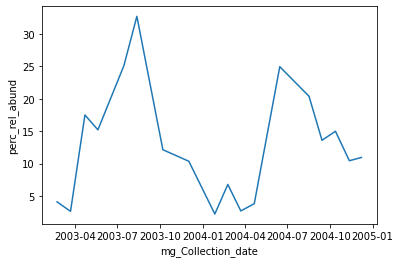

In [20]:
# quick and dirty:

plot_df = bdf[(bdf['Genome'] == 'unmapped') & (bdf['mg_year'] != '2009')]

sns.lineplot(x = 'mg_Collection_date', y = 100 - plot_df['perc_rel_abund'], data = plot_df)


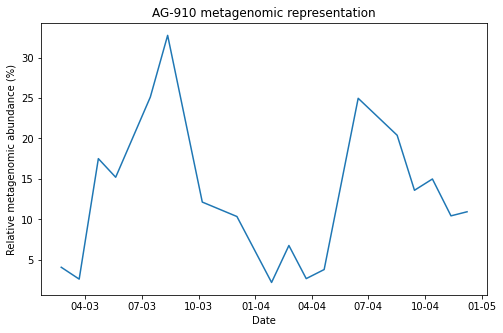

In [21]:
# A little nicer looking

fig, ax = plt.subplots(figsize=(8,5))

plot_df = bdf[(bdf['Genome'] == 'unmapped') & (bdf['mg_year'] != '2009')]

sns.lineplot(x = 'mg_Collection_date', y = 100 - plot_df['perc_rel_abund'], data = plot_df, ax = ax)

ax.set(xlabel="Date",
       ylabel="Relative metagenomic abundance (%)",
       title="AG-910 metagenomic representation")

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)


Overlay relative abundance by Month:

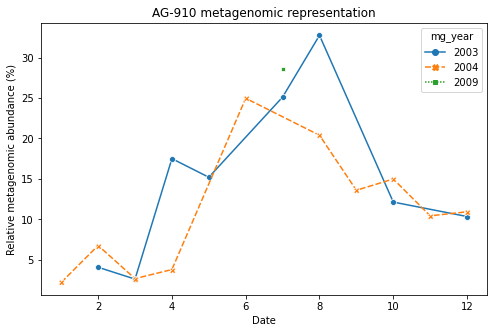

In [22]:
plot_df = bdf[(bdf['Genome'] == 'unmapped')]

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'mg_month', 
             y = 100 - plot_df['perc_rel_abund'], 
             hue = 'mg_year',
             style = 'mg_year',
             data = plot_df,
            markers = True, 
            ax = ax)

ax.set(xlabel="Date",
       ylabel="Relative metagenomic abundance (%)",
       title="AG-910 metagenomic representation")
plt.show()

Was there a difference in sampling depth?  When were metagenomes sampled from 10m?

Let's check up on sampling depth by highlighting those metagenomic timepoints that were sampled at 10m.

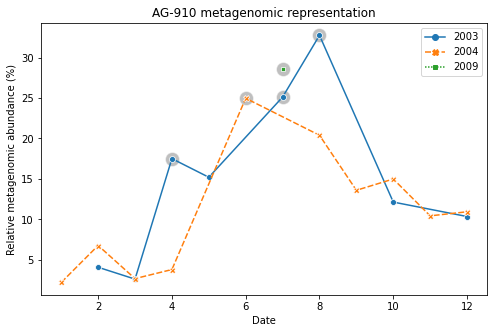

In [23]:
plot_df = bdf[(bdf['Genome'] == 'unmapped')]

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'mg_month', 
             y = 100 - plot_df['perc_rel_abund'], 
             hue = 'mg_year',
             style = 'mg_year',
             data = plot_df,
            markers = True,
            ax = ax)

# want to highlight samples that came from 10m depth
plot_df2 = bdf[(bdf['Genome'] == 'unmapped') & (bdf['mg_Depth'] == '10m')]

sns.scatterplot(x = 'mg_month', 
             y = 100 - plot_df['perc_rel_abund'], 
             s = 200,
            color = 'gray',
             alpha = 0.5,
             data = plot_df2,
            markers = True,
               ax = ax)

ax.set(xlabel="Date",
       ylabel="Relative metagenomic abundance (%)",
       title="AG-910 metagenomic representation")

plt.show()

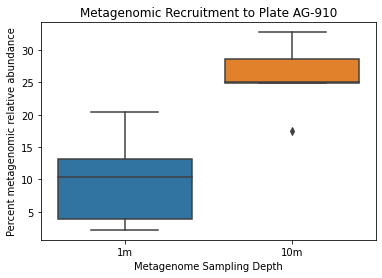

In [64]:
# Boxplot of metagenomic read recruitment by depth for all SAGs on plate

plot_df = bdf[bdf['Genome'] == 'unmapped']

sns.boxplot(x = plot_df['mg_Depth'], y = 100 - plot_df['perc_rel_abund'])

plt.ylabel('Percent metagenomic relative abundance')
plt.xlabel('Metagenome Sampling Depth')
plt.title('Metagenomic Recruitment to Plate AG-910')

plt.show()

One thing to note about running coverM on all SAGs at the same time is that you get an estimate of community abundance.  Metagenomic reads are competitively recruited. That is to say, if you have two very similar genomes and a read that matches both, it will only be counted once. As such, running CoverM on all cells as inputs in the same run will not return an 'individual's' abundance. 

If we sum the percent abundances per metagenomic run in the output table we're working with, you can see what I mean:

In [29]:
bdf.groupby(['mg_Run'])['perc_rel_abund'].sum()

mg_Run
SRR5720233    100.000000
SRR5720235     99.999995
SRR5720238    100.000006
SRR5720251    100.000002
SRR5720256    100.000001
SRR5720260    100.000003
SRR5720262    100.000002
SRR5720278    100.000000
SRR5720283     99.999994
SRR5720286     99.999994
SRR5720307    100.000002
SRR5720321     99.999999
SRR5720322    100.000000
SRR5720327     99.999999
SRR5720332    100.000002
SRR5720337    100.000000
SRR5720338    100.000000
SRR5720342    100.000002
SRR6507279     99.999999
Name: perc_rel_abund, dtype: float64

So looking at individual SAG abundances with these outputs is not going to be too informative if there are related genomes on the plate.  A more informative look would be to examine relative abundances of groups based on taxonomy.  Let's import the GTDBtk results.

In [32]:
gtdb = pd.read_csv("./data/AG-910_GTDB_classifications.csv")

In [34]:
gtdb.head()

,Unnamed: 0,SAG,GTDBtk_classification,classification_method,warnings,domain,phyla,class,order,family,genus,species
0,0,AG-910-A02,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__TMED112,g__TMED112,s__TMED112 sp003280455
1,1,AG-910-A04,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp902615855
2,2,AG-910-A06,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902567045
3,3,AG-910-A10,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__D2472,g__CACNXK01,s__CACNXK01 sp902518715
4,4,AG-910-A13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__GCA-002705445,f__GCA-002705445,g__GCA-2702235,s__GCA-2702235 sp002702235


In [37]:
bdf = bdf.merge(gtdb[['SAG','domain','phyla','class','order','family','genus','species']], 
          left_on = 'Genome', 
          right_on = 'SAG', 
          how = 'left')

In [46]:
bdf.columns

Index(['Genome', 'metagenome', 'perc_rel_abund', 'mg_Run',
       'mg_Collection_date', 'mg_cruise_id', 'mg_BioSample', 'mg_Depth',
       'mg_downloaded', 'mg_year', 'mg_month', 'mg_day', 'SAG', 'domain',
       'phyla', 'class', 'order', 'family', 'genus', 'species'],
      dtype='object')

In [47]:
order_rel_abund = bdf.groupby(['order','mg_Run','mg_Collection_date','mg_year','mg_month','mg_day'], as_index = False)['perc_rel_abund'].sum()

In [48]:
order_rel_abund

,order,mg_Run,mg_Collection_date,mg_year,mg_month,mg_day,perc_rel_abund
0,o__Actinomarinales,SRR5720233,2003-02-21,2003,2,21,0.043153
1,o__Actinomarinales,SRR5720235,2003-07-15,2003,7,15,0.087126
2,o__Actinomarinales,SRR5720238,2003-03-22,2003,3,22,0.041220
3,o__Actinomarinales,SRR5720251,2004-09-14,2004,9,14,0.478348
4,o__Actinomarinales,SRR5720256,2004-04-21,2004,4,21,0.159984
...,...,...,...,...,...,...,...
223,o__TMED127,SRR5720332,2003-10-07,2003,10,7,0.000000
224,o__TMED127,SRR5720337,2004-03-23,2004,3,23,0.000000
225,o__TMED127,SRR5720338,2004-01-27,2004,1,27,0.000000
226,o__TMED127,SRR5720342,2004-12-08,2004,12,8,0.000000


Now let's plot:

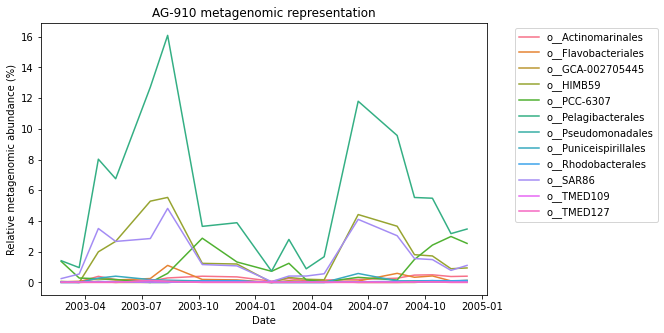

In [65]:
fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'mg_Collection_date', 
             y = 'perc_rel_abund', 
             hue = 'order', 
             data = order_rel_abund[order_rel_abund['mg_year'] != '2009'],
            ax = ax)

ax.set(xlabel="Date",
       ylabel="Relative metagenomic abundance (%)",
       title="AG-910 metagenomic representation")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

These results can also be visualized as a heatmap:

<AxesSubplot:xlabel='mg_Run', ylabel='order'>

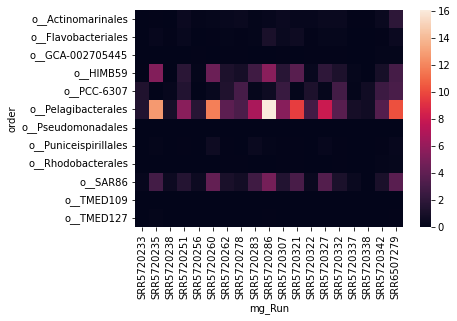

In [63]:
to_plot = order_rel_abund.pivot(index = 'order',columns = 'mg_Run', values = 'perc_rel_abund')

sns.heatmap(to_plot)

### Possible Next Steps:

#### Use different metagenomes
* Examine metagenomic representation of AG-910 at different locations and over time (e.g. HOT surface samples)
* Examine represenation of AG-910 in deeper samples

#### Use different genome inputs
* Run the same SAGs and metagenomes again, but add the ```--dereplicate``` flag in the CoverM command
* Run CoverM on individuals, rather than on a collection.
* Create heatmap of individual abundances
    * Do SAGs from the same genus exhibit similar patterns of relative abundance within these metagenomes?